In [511]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

import pickle

In [265]:
class Component:
    def __init__(self):
        self.chain = []
    
    def add_edge(self, edge):
        if len(self.chain) == 0:
            self.chain.append(edge[0])
            self.chain.append(edge[1])
            return True
        elif edge[0] == self.chain[-1]:
            self.chain.append(edge[1])
            return True
        elif edge[1] == self.chain[0]:
            self.chain.insert(0, edge[0])
            return True
        else:
            return False
        
        
    def allow_edge(self, edge):
        if len(self.chain) == 0:
            return True
        elif not edge[0] in self.chain[:-1] and not edge[1] in self.chain[1:] \
            and not (edge[0] == self.chain[-1] and edge[1] == self.chain[0]):
            return True
        else:
            return False
    
    def require_edge(self, edge):
        if not self.allow_edge(edge):
            return False
        if edge[0] == self.chain[-1]:
            return True
        if edge[1] == self.chain[0]:
            return True
        
    def merge(self, component):
        if component.chain[0] == self.chain[-1]:
            self.chain.extend(component.chain[1:])
            return True
        elif component.chain[-1] == self.chain[0]:
            new_chain = component.chain
            new_chain.extend(self.chain[1:])
            self.chain = new_chain
            return True
        else:
            return False
        
    def __str__(self):
        return str(self.chain)
    
    def __repr__(self):
        return str(self.chain)

In [279]:
c = Component()

In [464]:
def next_edge(graph, components, name):
    #name = 0
    #done = False
    for argmax in tqdm_notebook(graph.flatten().argsort()[::-1]):
        edge = (argmax // graph.shape[0], argmax % graph.shape[0])
        
        #print(edge, len(components))
        if len(components) == 0:
            c = Component()
            c.add_edge(edge)
            components[name] = c
            name += 1
            #break
        else:
            if all([comp.allow_edge(edge) for comp in components.values()]):
                require_names = [name for name in components if components[name].require_edge(edge)]
                #print("rn", require_names)
                if len(require_names) == 0:
                    c = Component()
                    c.add_edge(edge)
                    components[name] = c
                    name += 1
                    #break
                elif len(require_names) == 1:
                    components[require_names[0]].add_edge(edge)
                    #break
                elif len(require_names) == 2:
                    components[require_names[0]].add_edge(edge)
                    components[require_names[0]].merge(components[require_names[1]])
                    components.pop(require_names[1])
                    #break
    return name

In [48]:
def plot_gr(gr, start=0, end=-1, log = False, all_ticks = False,  s=10):
    plt.figure(figsize=(s,s))
    if end == -1:
        end = gr.shape[0]
    if log:
        plt.imshow(np.log(gr[start:end,start:end] + 1))
    else:
        plt.imshow(gr[start:end,start:end])
    plt.colorbar()
    if all_ticks: 
        plt.xticks(np.arange(start,end))
        plt.yticks(np.arange(start,end))
    plt.show()

In [494]:
def a_in_b(a,b):
    a = np.array(a)
    b = np.array(b)
    if len(a) > len(b):
        return False
    else:
        for i in range(len(b) - len(a) + 1):
            if all(b[i:i + len(a)] == a):
                return True
    return False

In [3]:
m =  np.zeros((3,3))
m[0,1] = 1
m[1,2] = 1
m[2,0] = 1

In [8]:
mn = m + np.random.normal(0, 0.1, (3,3))

In [18]:
import some_tsm as stsm

## Simple greedy

add headiest, non-cycle, no tree edge

In [17]:
np.argsort(m.flatten)[::-1]

array([0])

In [28]:
m

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [29]:
start_v = set()
end_v= set()
edges = set()

next_edge(m, start_v, end_v, edges)

In [30]:
print(start_v, end_v, edges)

{2} {0} {(2, 0)}


In [33]:
next_edge(m, start_v, end_v, edges)
print(start_v, end_v, edges)

{0, 1, 2} {0, 1, 2} {(1, 2), (2, 0), (0, 1)}


In [99]:
gr_ES = np.load("../data/graphs/ES3_22.npy")[:35,:35]

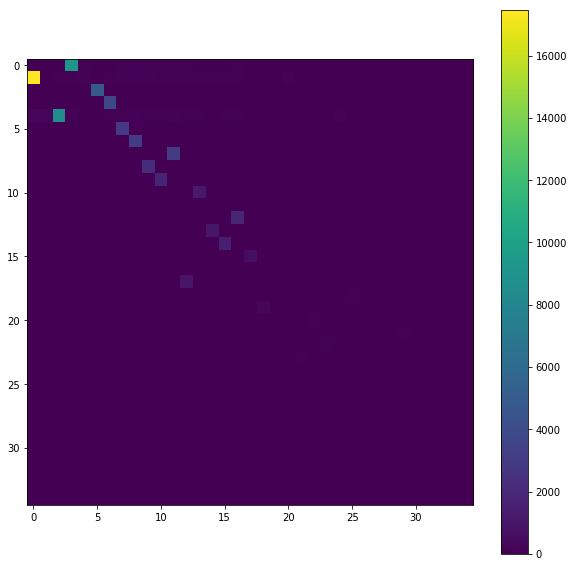

In [100]:
plot_gr(gr_ES)

In [209]:
l = [1,2,3]

In [211]:
l.insert(0,0)

In [212]:
l.

[0, 1, 2, 3]

In [503]:
components = {}
name = 0

In [504]:
name = next_edge(gr_ES, components, name)
print(components, name)

A Jupyter Widget


{0: [4, 2, 5, 7, 11, 24, 19, 18, 25, 30, 27, 26, 28, 31, 32, 33, 34, 20, 22, 23, 21, 29, 1, 0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16]} 10


In [505]:
chain = components[0].chain

In [449]:
weights = []
for i,j in zip(chain[:-1] , chain[1:]):
    weights.append(gr_ES[i,j])

In [281]:
all_cass

{0: [1, 0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16],
 2: [4, 2, 5, 7, 11],
 4: [24, 19, 18, 25, 30, 27, 26, 28, 31, 32, 33, 34],
 6: [20, 22, 23, 21, 29]}

In [452]:
np.where(np.array(weights) == 0)

(array([ 4, 16, 21]),)

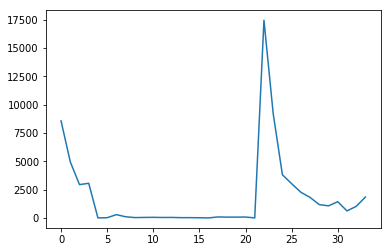

In [458]:
plt.plot(weights)
plt.show()

In [487]:
gr_SlO = np.load("../data/graphs/SlO_22.npy")

In [488]:
components_slo = {}
name_slo = 0

In [489]:
name_slo = next_edge(gr_SlO[:, :], components_slo, name_slo)
print(components_slo, name_slo)

A Jupyter Widget


{0: [1163, 1000, 1126, 1354, 628, 1774, 791, 814, 1744, 701, 468, 487, 1369, 1619, 949, 1121, 1124, 1182, 1201, 1181, 1217, 1248, 1081, 1025, 918, 1501, 1343, 945, 828, 1641, 905, 904, 1380, 804, 886, 990, 1652, 1665, 807, 1794, 1579, 221, 265, 397, 389, 1764, 1514, 503, 1024, 1009, 854, 727, 747, 1102, 1225, 1136, 958, 870, 226, 259, 386, 535, 380, 303, 433, 805, 710, 684, 564, 595, 391, 675, 888, 693, 1693, 644, 1037, 1086, 1518, 800, 1650, 1314, 936, 1561, 920, 1660, 1505, 570, 563, 1012, 1683, 1243, 1091, 1237, 1094, 1374, 621, 1704, 1415, 1087, 1311, 1381, 572, 525, 540, 395, 728, 1773, 458, 660, 1390, 1786, 946, 1575, 1038, 156, 691, 491, 405, 612, 1222, 1205, 1173, 1378, 1238, 1481, 1476, 555, 1394, 910, 1234, 993, 1062, 642, 1402, 755, 1293, 261, 725, 1734, 1776, 1546, 1765, 773, 788, 1484, 697, 1265, 1331, 880, 1348, 1444, 1618, 1755, 1376, 1675, 1401, 970, 1309, 1233, 350, 1630, 666, 428, 372, 183, 256, 976, 1584, 678, 1779, 607, 639, 1035, 1519, 578, 545, 597, 305, 587, 176

In [491]:
chain = np.array(components_slo[0].chain)
np.save("../data/graphs/slo_main_chain_22", chain)

In [492]:
weights = []
for i,j in zip(chain[:-1] , chain[1:]):
    weights.append(gr_SlO[i,j])
weights = np.array(weights).astype(int)

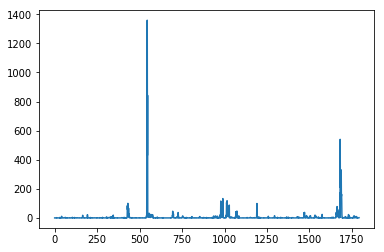

In [497]:
plt.plot(weights)
plt.show()

In [493]:
[x for x in zip(chain, weights)]

[(1163, 0),
 (1000, 0),
 (1126, 0),
 (1354, 0),
 (628, 0),
 (1774, 0),
 (791, 0),
 (814, 0),
 (1744, 0),
 (701, 1),
 (468, 2),
 (487, 0),
 (1369, 0),
 (1619, 0),
 (949, 0),
 (1121, 1),
 (1124, 0),
 (1182, 0),
 (1201, 0),
 (1181, 0),
 (1217, 0),
 (1248, 0),
 (1081, 0),
 (1025, 0),
 (918, 0),
 (1501, 0),
 (1343, 0),
 (945, 0),
 (828, 0),
 (1641, 0),
 (905, 3),
 (904, 0),
 (1380, 0),
 (804, 1),
 (886, 2),
 (990, 0),
 (1652, 0),
 (1665, 0),
 (807, 0),
 (1794, 0),
 (1579, 1),
 (221, 11),
 (265, 3),
 (397, 1),
 (389, 1),
 (1764, 0),
 (1514, 0),
 (503, 0),
 (1024, 1),
 (1009, 0),
 (854, 0),
 (727, 1),
 (747, 1),
 (1102, 0),
 (1225, 0),
 (1136, 0),
 (958, 0),
 (870, 1),
 (226, 1),
 (259, 1),
 (386, 0),
 (535, 0),
 (380, 4),
 (303, 3),
 (433, 1),
 (805, 0),
 (710, 0),
 (684, 1),
 (564, 0),
 (595, 0),
 (391, 1),
 (675, 0),
 (888, 0),
 (693, 1),
 (1693, 0),
 (644, 1),
 (1037, 0),
 (1086, 0),
 (1518, 0),
 (800, 0),
 (1650, 0),
 (1314, 0),
 (936, 0),
 (1561, 0),
 (920, 0),
 (1660, 0),
 (1505, 0),
 

In [501]:
np.where(weights > 5)

(array([  41,  164,  165,  193,  305,  328,  329,  338,  341,  345,  428,
         429,  430,  431,  432,  433,  434,  435,  436,  437,  438,  440,
         540,  541,  542,  543,  544,  545,  546,  547,  548,  549,  551,
         552,  553,  554,  555,  556,  557,  560,  561,  562,  564,  565,
         566,  567,  568,  569,  570,  571,  572,  573,  574,  576,  577,
         604,  692,  693,  694,  695,  696,  697,  698,  699,  719,  720,
         721,  727,  728,  752,  753,  754,  806,  808,  854,  855,  936,
         945,  946,  947,  948,  949,  958,  975,  978,  979,  980,  981,
         982,  983,  985,  986,  987,  988,  989,  990,  991, 1010, 1011,
        1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022,
        1023, 1024, 1025, 1026, 1027, 1028, 1034, 1042, 1063, 1067, 1068,
        1069, 1070, 1072, 1073, 1074, 1082, 1084, 1190, 1191, 1198, 1258,
        1294, 1295, 1366, 1428, 1430, 1437, 1438, 1468, 1469, 1470, 1471,
        1476, 1482, 1483, 1484, 1489, 

In [499]:
chain[:-1][weights > 2]

array([ 905,  221,  265,  380,  303,  540,  491,  428,  372,  183,  251,
        291,  577,  527,  334,  326,  346,  427,  260,  406,  355,  278,
        483,  614,  401,  115,   59,  158,  762,   37,   29,   22,   30,
         20,   24,   43,   50,   79,   60,   67,   72,  106,  225, 1023,
         19,   17,    5,    3,    0,    2,    4,    1,    6,   32,   69,
        124,   61,  100,  111,   47,  109,  141,  236,  116,  118,  162,
        180,  128,  222,  104,   76,  145,  134,  105,   93,  131,  120,
        112,  121,  169,  125,  199,  504,  460,  356,  285,  207,  213,
        117,   92,  165,  283,  253,  399,  382,  336,  342,  345,   71,
         89,  542,  267,  223,  127,   96,   65,   46,   41,  657,  536,
        194,  292,  264,  273,  252,  193,  569,  523,  863,  392,  172,
        510,  277,  244,  304,  274,  245,  178,  598,  358,  173,   28,
         45,   68,   48,   36,   39,  129,  276,   86,   52,   64,  126,
         18,   23,   57,  170,  139,   38,   26,   

In [496]:
a_in_b([3,0,5], chain)

False

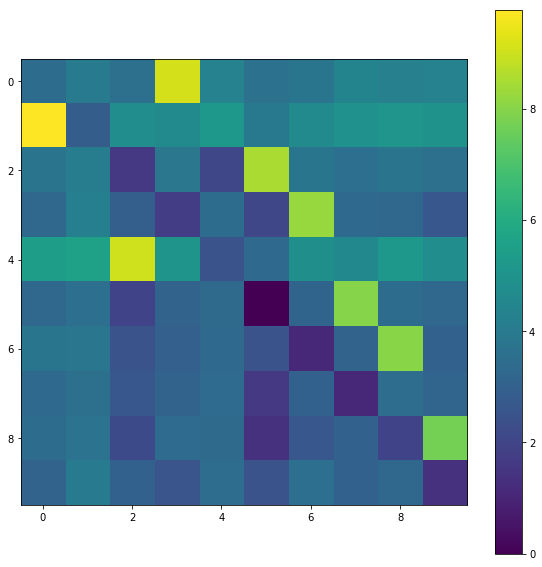

In [526]:
plot_gr(gr_ES[:10, : 10], log=1)

In [513]:
n_to_cl = pickle.load(open("../data/dicts/ES3_n_to_cl", 'rb'))
cl_to_n = pickle.load(open("../data/dicts/ES3_cl_to_n", 'rb'))
nd = pickle.load(open("../data/dicts/ES3_nd", 'rb'))

In [516]:
n_to_cl[4]

'CAAGTGATATCCATCATCGCATCCAGTGCGC'

In [520]:
for i in [4,2,5,7]:
    print(n_to_cl[i])

CAAGTGATATCCATCATCGCATCCAGTGCGC
AGTGCTGGACCATTTCAAATTCACAATAGAT
GGAATGATATTTCAATAAATAATTATAACAA
CCCTCACACCGATTCGCCAAACGGTGGAGAA


In [521]:
for i in [1,0,3,6]:
    print(n_to_cl[i])

GACAGAACGGCCTCAGTAGTCTCGTCAGGCT
ACACGCCCTTATCAAATAGCTGTGATTTACC
ATAGACCCCGAACAACAATACGCGCAAACCG
TACCGTACAGACTGCCGGATATTATTTTTTT


In [523]:
for i in range(6):
    print(nd[n_to_cl[i]])

28374
20414
14353
13974
11315
8389


In [281]:
all_cass

{0: [1, 0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16],
 2: [4, 2, 5, 7, 11],
 4: [24, 19, 18, 25, 30, 27, 26, 28, 31, 32, 33, 34],
 6: [20, 22, 23, 21, 29]}

In [531]:
weights = []
for i,j in zip(chain[:-1] , chain[1:]):
    weights.append(gr_ES[i,j])
    
weights = np.array(weights).astype(int)

In [535]:
[x for x in zip(np.array(chain), weights)]

[(4, 8568),
 (2, 4956),
 (5, 2941),
 (7, 3059),
 (11, 0),
 (24, 18),
 (19, 289),
 (18, 102),
 (25, 30),
 (30, 42),
 (27, 52),
 (26, 38),
 (28, 42),
 (31, 24),
 (32, 24),
 (33, 14),
 (34, 0),
 (20, 86),
 (22, 69),
 (23, 69),
 (21, 77),
 (29, 0),
 (1, 17455),
 (0, 9224),
 (3, 3815),
 (6, 3022),
 (8, 2268),
 (9, 1809),
 (10, 1174),
 (13, 1067),
 (14, 1432),
 (15, 619),
 (17, 1019),
 (12, 1845)]

In [552]:
s_0 = [1, 0, 3, 6, 8, 9]
s_1 = [4,2,5,7,11]
s_2 = [24, 19, 18, 25, 30]
s_3 = [20, 22, 23, 21, 29]
for i in s_1:
    for j in s_2:
        print(i,j,gr_ES[i,j], gr_ES[j,i])

4 24 138.0 0.0
4 19 2.0 1.0
4 18 0.0 10.0
4 25 2.0 2.0
4 30 1.0 2.0
2 24 0.0 0.0
2 19 2.0 0.0
2 18 0.0 2.0
2 25 0.0 2.0
2 30 0.0 0.0
5 24 0.0 2.0
5 19 0.0 0.0
5 18 0.0 3.0
5 25 0.0 0.0
5 30 0.0 0.0
7 24 0.0 1.0
7 19 1.0 0.0
7 18 1.0 2.0
7 25 0.0 1.0
7 30 1.0 0.0
11 24 0.0 1.0
11 19 0.0 0.0
11 18 0.0 0.0
11 25 0.0 0.0
11 30 0.0 3.0


In [542]:
gr_ES[3,0]

25.0